In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
well_train = pd.read_csv('Jones.csv', skiprows=10)
well_pred = pd.read_csv('Kenyon.csv', skiprows=9)
well_train

,Depth,facno,facies,TH,U,K,RHOMAA,UMAA,PHIN
0,13.5,1,Marine,7.65,9.17,1.21,2.78,10.72,42.1
1,14.0,1,Marine,7.79,9.21,1.21,2.74,10.88,43.2
2,14.5,1,Marine,7.57,9.13,1.16,2.70,10.88,40.4
3,15.0,1,Marine,7.30,9.01,1.10,2.70,13.04,37.8
4,15.5,1,Marine,9.10,9.55,1.72,2.71,12.71,35.5
...,...,...,...,...,...,...,...,...,...
919,473.0,1,Marine,10.54,4.18,2.34,2.95,8.99,43.6
920,473.5,1,Marine,10.71,4.29,2.39,2.91,9.43,40.0
921,474.0,1,Marine,10.54,4.19,2.30,2.86,9.57,34.4
922,474.5,1,Marine,10.44,4.14,2.21,2.82,9.86,28.5


In [ ]:
well_train.describe()

,Depth,facno,TH,U,K,RHOMAA,UMAA,PHIN
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,244.250000,2.997835,8.219903,2.327576,0.988950,2.727760,7.125130,31.651732
std,133.440061,1.491760,3.831753,2.094274,0.547497,0.097096,1.795251,6.558564
min,13.500000,0.000000,1.920000,-0.920000,0.040000,2.400000,4.990000,10.200000
25%,128.875000,2.000000,4.532500,0.940000,0.530000,2.650000,5.730000,28.100000
50%,244.250000,3.000000,8.100000,1.980000,0.845000,2.710000,6.540000,30.250000
75%,359.625000,4.000000,11.220000,2.892500,1.422500,2.810000,8.102500,32.900000
max,475.000000,6.000000,22.950000,14.430000,2.580000,3.000000,13.040000,54.800000


In [ ]:
well_pred.describe()

,Depth,TH,U,K,RHOMAA,UMAA,PHIN
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,294.500000,10.361486,3.047058,1.290495,2.824995,8.106006,35.745096
std,142.822005,4.600216,2.982209,0.842513,0.110936,1.997751,7.311803
min,47.500000,0.360000,-1.060000,-0.100000,2.590000,4.850000,6.800000
25%,171.000000,7.110000,1.440000,0.600000,2.730000,6.530000,31.100000
50%,294.500000,10.740000,2.460000,1.200000,2.840000,7.990000,34.300000
75%,418.000000,13.580000,3.820000,1.700000,2.910000,9.420000,40.200000
max,541.500000,27.100000,19.310000,4.600000,3.090000,15.030000,56.500000


In [ ]:
well_train = well_train.replace('-', 'unknown')

unknown        42
Marine        128
paralic       156
floodplain    232
channel       262
splay          38
paleosol       66
Name: facno, dtype: int64

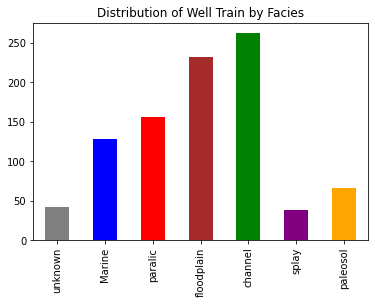

In [ ]:
facno_labels = [0, 1, 2, 3, 4, 5, 6]
facies_labels = ['unknown','Marine', 'paralic', 'floodplain', 'channel',
                 'splay', 'paleosol']
facies_colors = ['grey','blue', 'red', 'brown', 'green', 'purple', 'orange']
facies_counts = well_train['facno'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors,
                   title='Distribution of Well Train by Facies')
facies_counts

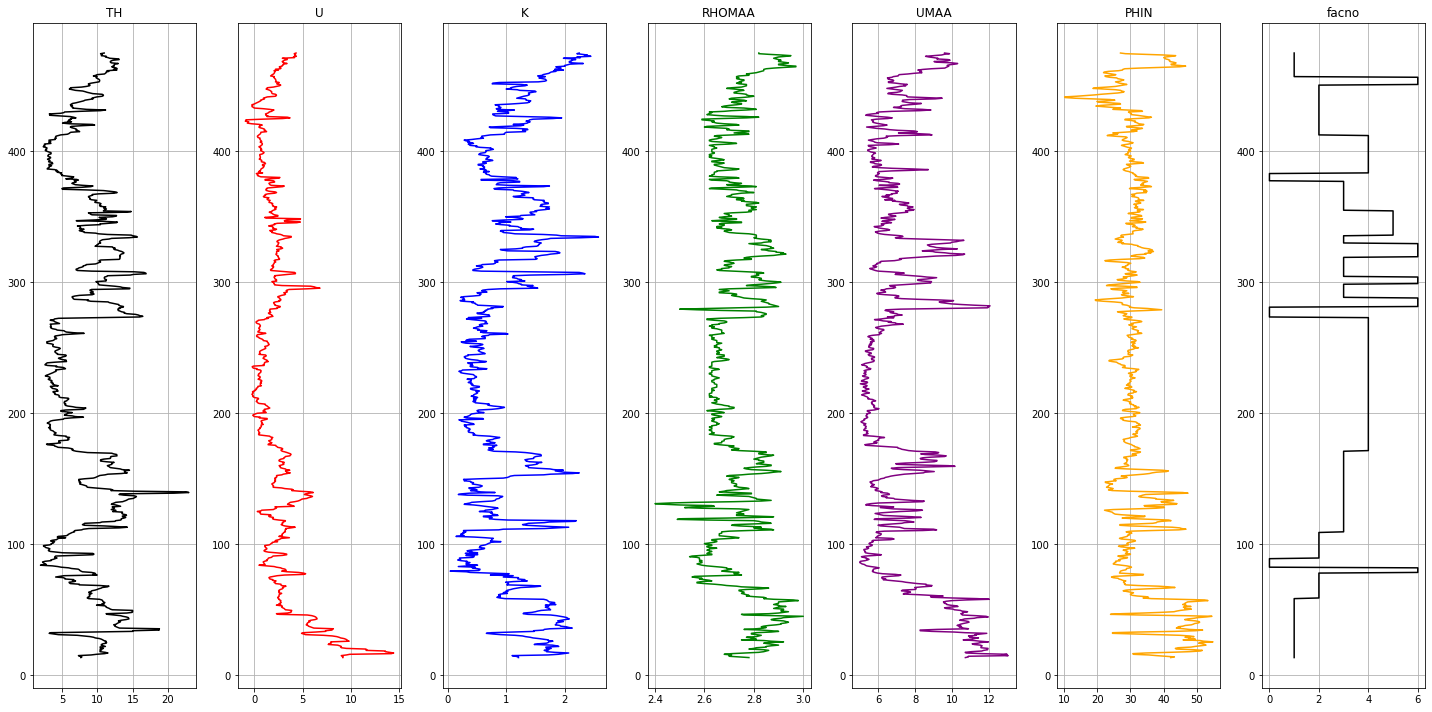

In [ ]:
# Display train well data

# define what logs are we going to us
logs = ['TH', 'U', 'K', 'RHOMAA', 'UMAA', 'PHIN', 'facno']

# create teh subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots
colors = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'black']

for i in range(len(logs)):
  ax[i].plot(well_train[logs[i]], well_train['Depth'], color=colors[i])
  ax[i].set_title(logs[i])
  ax[i].grid(True)

plt.tight_layout(1.1)
plt.show()

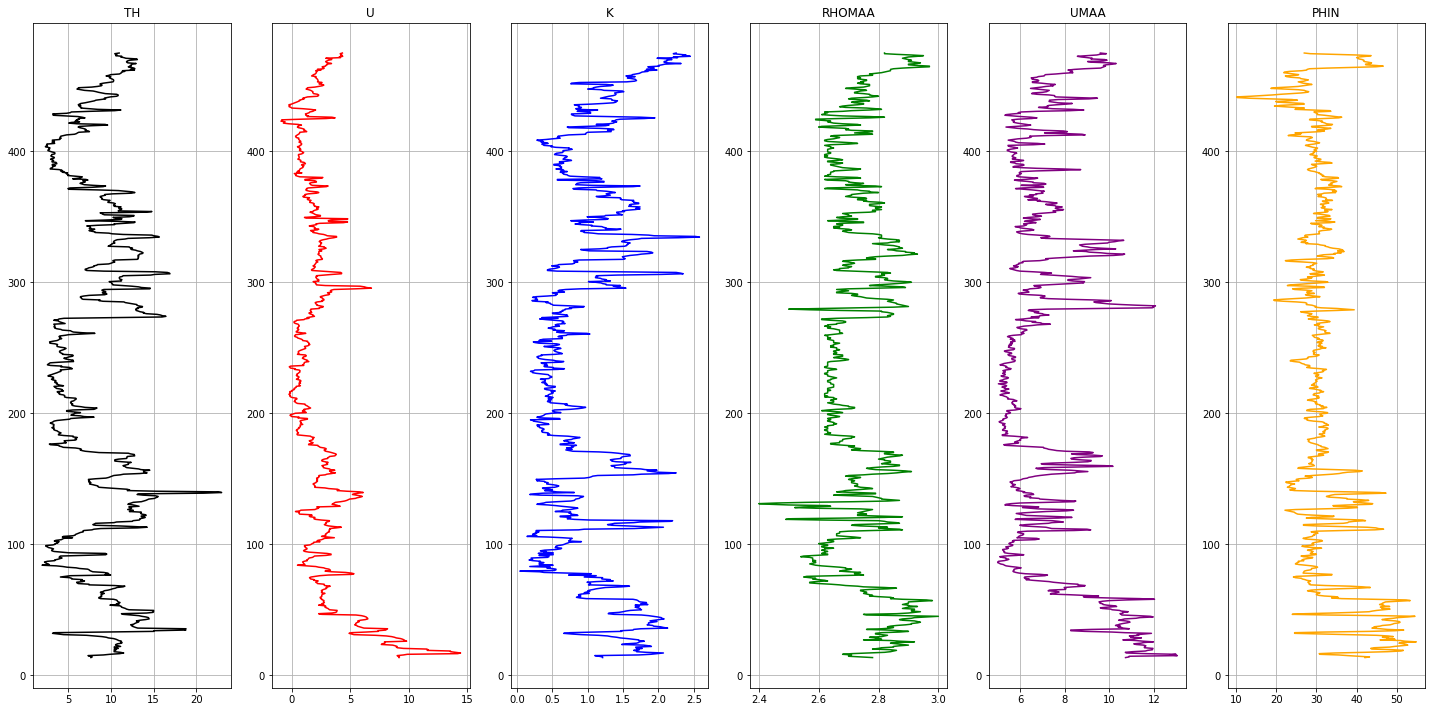

In [ ]:
# Display the test data

# define what logs are we going to us
logs = ['TH', 'U', 'K', 'RHOMAA', 'UMAA', 'PHIN']

# create teh subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots
colors = ['black', 'red', 'blue', 'green', 'purple', 'orange']

for i in range(len(logs)):
  ax[i].plot(well_train[logs[i]], well_train['Depth'], color=colors[i])
  ax[i].set_title(logs[i])
  ax[i].grid(True)

plt.tight_layout(1.1)
plt.show()

In [ ]:
well_train = well_train.drop('facies', 1)

In [ ]:
depth_train, depth_pred = well_train.pop('Depth'), well_pred.pop('Depth')
well_train['Depth'], well_pred['Depth'] = depth_train, depth_pred

well_train

,facno,TH,U,K,RHOMAA,UMAA,PHIN,Depth
0,1,7.65,9.17,1.21,2.78,10.72,42.1,13.5
1,1,7.79,9.21,1.21,2.74,10.88,43.2,14.0
2,1,7.57,9.13,1.16,2.70,10.88,40.4,14.5
3,1,7.30,9.01,1.10,2.70,13.04,37.8,15.0
4,1,9.10,9.55,1.72,2.71,12.71,35.5,15.5
...,...,...,...,...,...,...,...,...
919,1,10.54,4.18,2.34,2.95,8.99,43.6,473.0
920,1,10.71,4.29,2.39,2.91,9.43,40.0,473.5
921,1,10.54,4.19,2.30,2.86,9.57,34.4,474.0
922,1,10.44,4.14,2.21,2.82,9.86,28.5,474.5


In [ ]:
train_features = ['TH', 'U', 'K', 'RHOMAA', 'UMAA', 'PHIN']

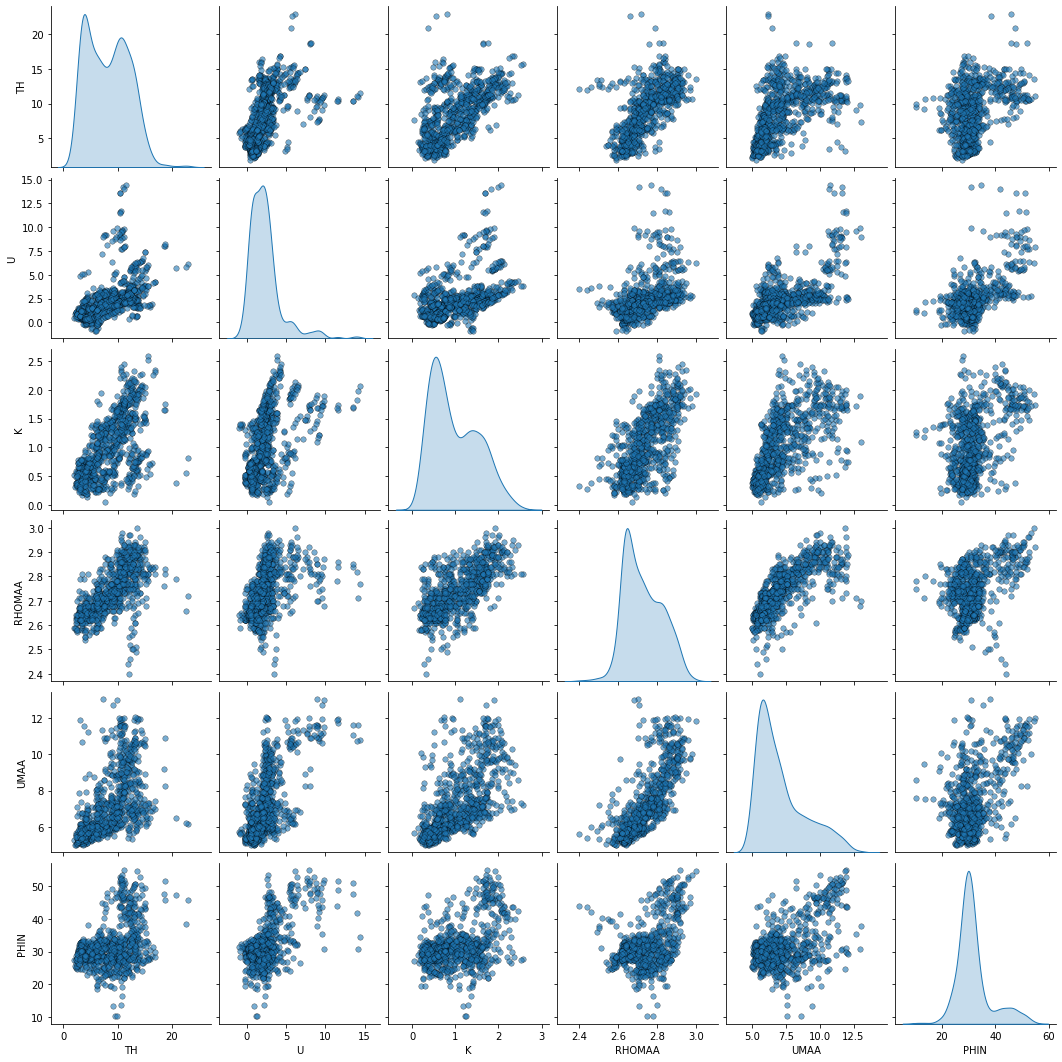

In [ ]:
sns.pairplot(well_train, vars=train_features, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

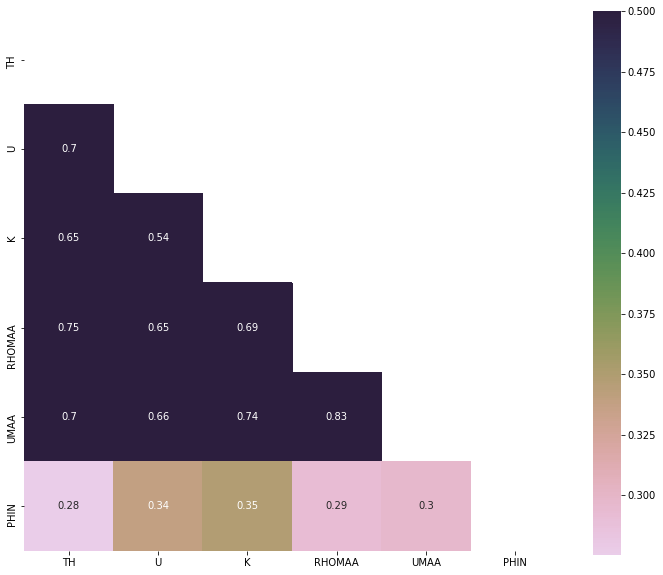

In [ ]:
well_train_only_features = well_train[train_features]

#Generate a mask for the upper triangle
mask = np.zeros_like(well_train_only_features.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap= True)

#Darw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(well_train_only_features.corr(method='spearman'), annot=True, mask=mask, cmap=cmap, vmax=.5, square=True)

plt.show()

In [ ]:
colnames = well_train.columns
only_feature = ['TH', 'U', 'K', 'RHOMAA', 'UMAA', 'PHIN'] #Only feature column name
only_target = ['facno','Depth'] #Only target column names
feature_target = np.append(only_feature, only_target) #feature and target column names

colnames

Index(['facno', 'TH', 'U', 'K', 'RHOMAA', 'UMAA', 'PHIN', 'Depth'], dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

#Normalize Using Power transform Yeo-Johnson Method
scaler = PowerTransformer(method='yeo-johnson')

##ColumnTransformer
ct = ColumnTransformer([('transform', scaler, only_feature)], remainder='passthrough')

##fit and transform
well_train_norm = ct.fit_transform(well_train)

##Convert to dataframe
well_train_norm = pd.DataFrame(well_train_norm, columns=feature_target)
well_train_norm

,TH,U,K,RHOMAA,UMAA,PHIN,facno,Depth
0,-0.019708,2.316401,0.569893,0.593253,1.613774,1.532398,1.0,13.5
1,0.017068,2.323692,0.569893,0.195641,1.643674,1.658125,1.0,14.0
2,-0.040883,2.309082,0.489140,-0.225337,1.643674,1.330573,1.0,14.5
3,-0.113232,2.286956,0.388680,-0.225337,1.946402,1.002500,1.0,15.0
4,0.345394,2.384565,1.268817,-0.117814,1.909891,0.690242,1.0,15.5
...,...,...,...,...,...,...,...,...
919,0.678130,1.075215,1.903598,2.055777,1.183999,1.702945,1.0,473.0
920,0.715736,1.113522,1.947483,1.741782,1.315494,1.281683,1.0,473.5
921,0.678130,1.078730,1.867818,1.324362,1.353670,0.532712,1.0,474.0
922,0.655854,1.061089,1.785024,0.969023,1.427750,-0.422217,1.0,474.5


In [ ]:
well_train_norm['facno'] = well_train_norm['facno'].astype(int)
well_train_norm['facno']

0      1
1      1
2      1
3      1
4      1
      ..
919    1
920    1
921    1
922    1
923    1
Name: facno, Length: 924, dtype: int64

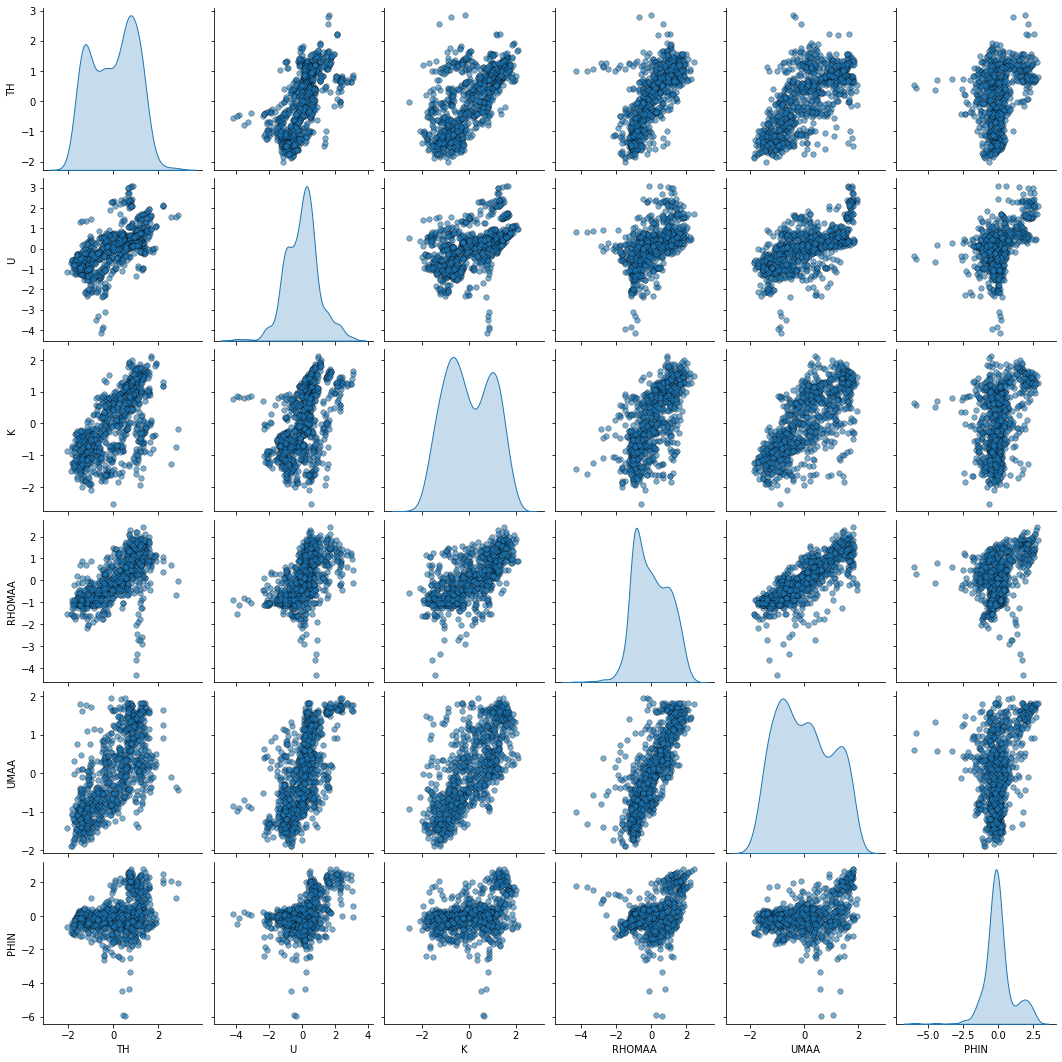

In [ ]:
sns.pairplot(well_train_norm, vars=only_feature, diag_kind = 'kde',
             plot_kws = {'alpha' : 0.6, 's':30, 'edgecolor': 'k'})

In [ ]:
#Make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# On the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['Depth','facno'], axis=1)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

#Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NeNs
well_train_std = well_train_std.dropna()

# Method 2 : Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3 : Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

In [ ]:
# Method 4 : Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Mathod 5 : One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                        : 924
Number of points after outliers removed with Standard Deviation : 907
Number of points after outliers removed with Isolation Forest   : 462
Number of points after outliers removed with Min. Covariance    : 831
Number of points after outliers removed with Outlier Factor     : 647
Number of points after outliers removed with One-Class SVM      : 830


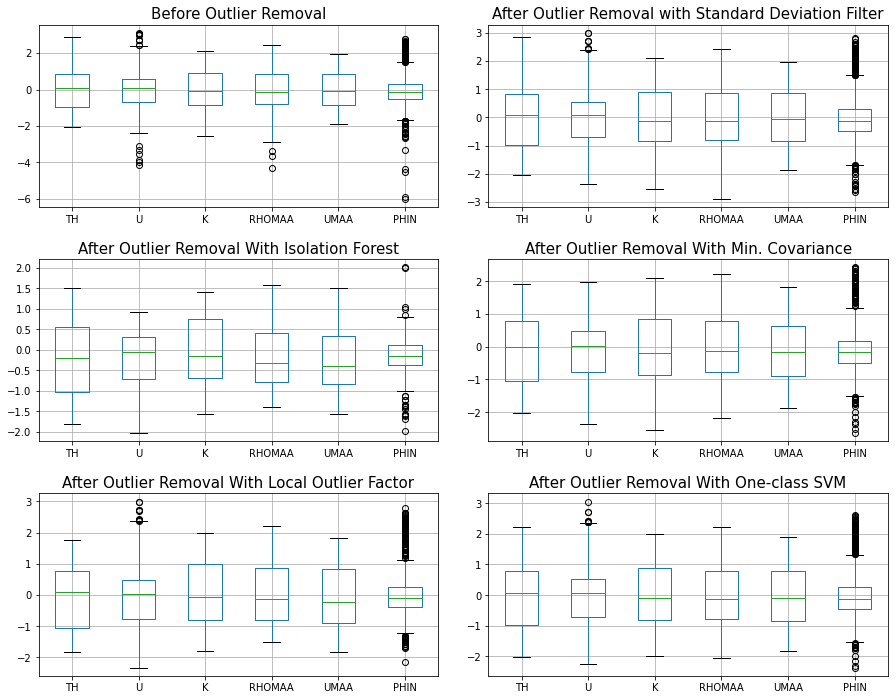

In [ ]:
print ('Number of points before outliers removed                        :', len(well_train_norm))
print ('Number of points after outliers removed with Standard Deviation :', len(well_train_std))
print ('Number of points after outliers removed with Isolation Forest   :', len(well_train_iso))
print ('Number of points after outliers removed with Min. Covariance    :', len(well_train_ee))
print ('Number of points after outliers removed with Outlier Factor     :', len(well_train_lof))
print ('Number of points after outliers removed with One-Class SVM      :', len(well_train_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[only_feature].boxplot() #kenapa only_feature karena yang kita coba hapus adalah only feature bukan feature target
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[only_feature].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[only_feature].boxplot()
plt.title('After Outlier Removal With Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[only_feature].boxplot()
plt.title('After Outlier Removal With Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[only_feature].boxplot()
plt.title('After Outlier Removal With Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[only_feature].boxplot()
plt.title('After Outlier Removal With One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

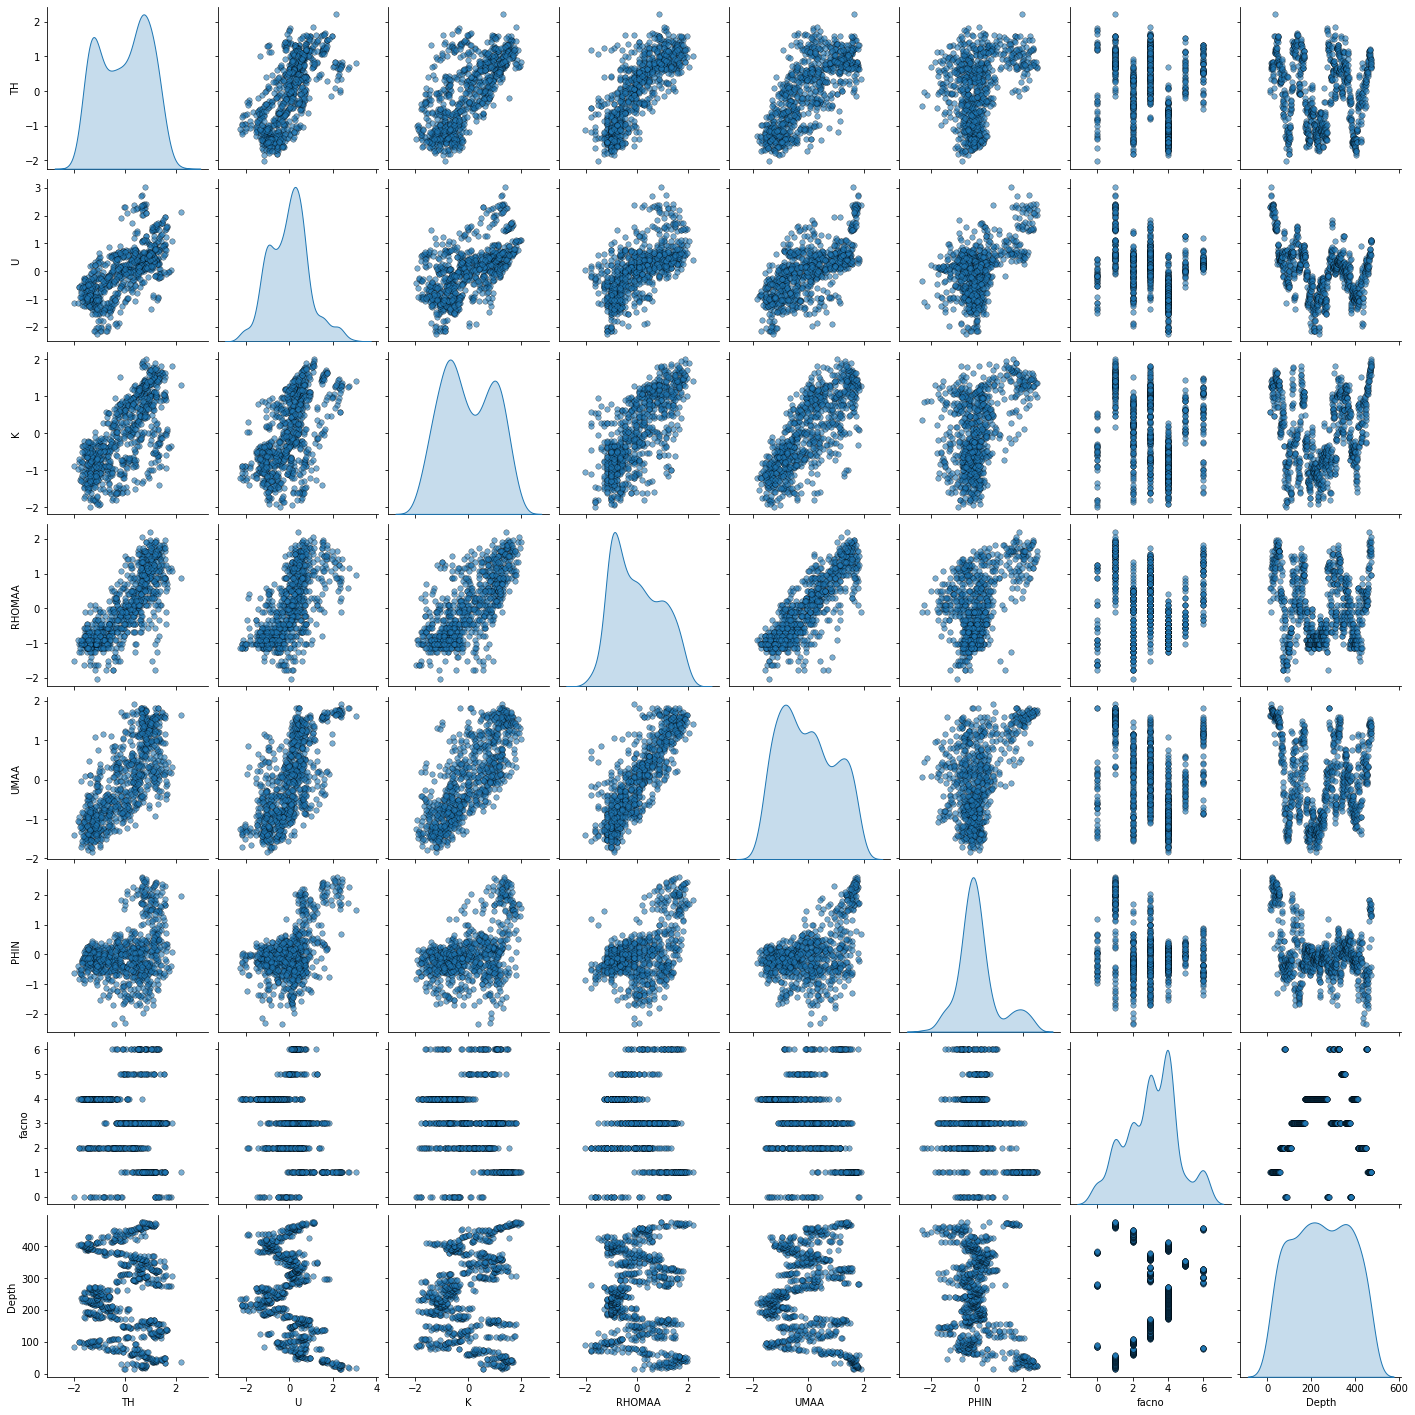

In [ ]:
sns.pairplot(well_train_svm, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's' : 30, 'edgecolor': 'k'})

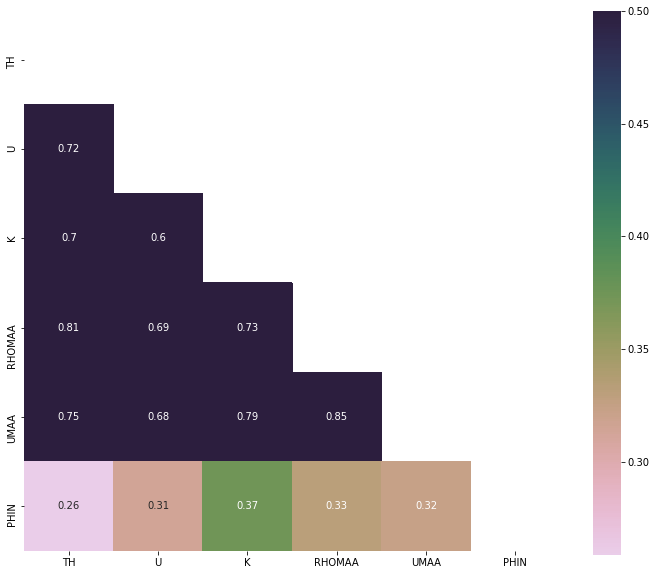

In [ ]:
well_train_svm_only_features = well_train_svm[train_features]

#Generate a mask for the upper triangle
mask = np.zeros_like(well_train_svm_only_features.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap= True)

#Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(well_train_svm_only_features.corr(method='spearman'), annot=True, mask=mask,
            cmap=cmap, vmax=.5, square=True)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn import svm

In [ ]:
#Define the train data
feature = ['TH', 'U', 'K', 'RHOMAA', 'UMAA', 'PHIN']
target = 'facno'

In [ ]:
x_train = well_train_svm[feature].values
y_train = well_train_svm[target].values
x_test = well_train_norm[feature].values
y_test = well_train_norm[target].values

In [ ]:
#create the classifier
model = svm.SVC()

#training model
model.fit(x_train, y_train)

#predict on well train
y_pred = model.predict(x_test)

In [ ]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[ 11   0  13   6  11   0   1]
 [  0 113   5   9   0   0   1]
 [  0   5 111  25  15   0   0]
 [  1   2  11 216   1   0   1]
 [  0   0   6   4 252   0   0]
 [  0   0   3  27   0   8   0]
 [  0   0   3  39   0   0  24]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.26      0.41        42
           1       0.94      0.88      0.91       128
           2       0.73      0.71      0.72       156
           3       0.66      0.93      0.77       232
           4       0.90      0.96      0.93       262
           5       1.00      0.21      0.35        38
           6       0.89      0.36      0.52        66

    accuracy                           0.80       924
   macro avg       0.86      0.62      0.66       924
weighted avg       0.82      0.80      0.78       924



<function matplotlib.pyplot.show>

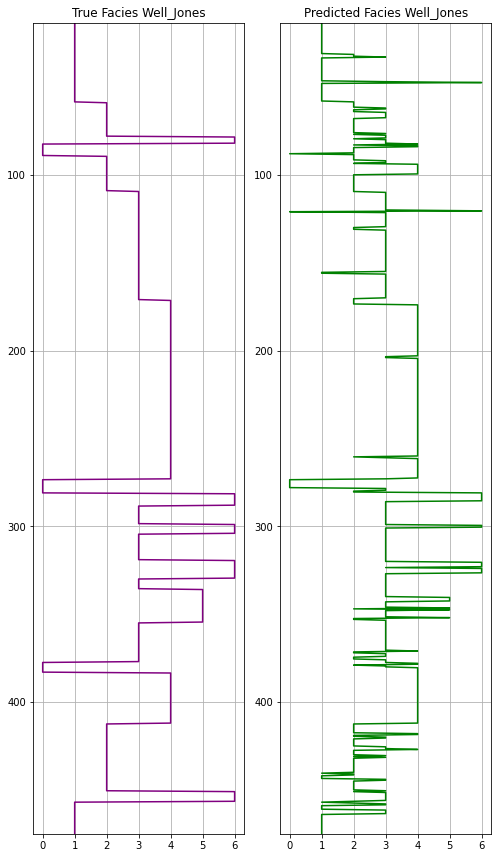

In [ ]:
x = [y_test, y_pred]
y = [well_train_norm['Depth'], well_train_norm['Depth']]

color = ['purple', 'green']
title = ['True Facies Well_Jones', 'Predicted Facies Well_Jones']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,12))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])
  ax[i].grid(True)

plt.tight_layout(1)

plt.show

In [ ]:
#create the classifier
model = KNeighborsClassifier()

n_neighbors=5,
weights='uniform',
algorithm='auto',
leaf_size=30,
p=2,
metric='minkowski',
metric_params=None,
n_jobs=None,

model.fit(x_train,y_train)

y_predkn = model.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(y_test, y_predkn)
print(conf)

[[ 22   0   5   8   6   0   1]
 [  0 119   1   4   2   0   2]
 [  5   3 121  10  10   3   4]
 [  5   1  11 211   2   0   2]
 [  2   0   3   0 257   0   0]
 [  0   0   1   8   0  29   0]
 [  0   1   3   8   0   0  54]]


In [ ]:
print(classification_report(y_test,y_predkn))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        42
           1       0.96      0.93      0.94       128
           2       0.83      0.78      0.80       156
           3       0.85      0.91      0.88       232
           4       0.93      0.98      0.95       262
           5       0.91      0.76      0.83        38
           6       0.86      0.82      0.84        66

    accuracy                           0.88       924
   macro avg       0.85      0.81      0.83       924
weighted avg       0.88      0.88      0.88       924



<function matplotlib.pyplot.show>

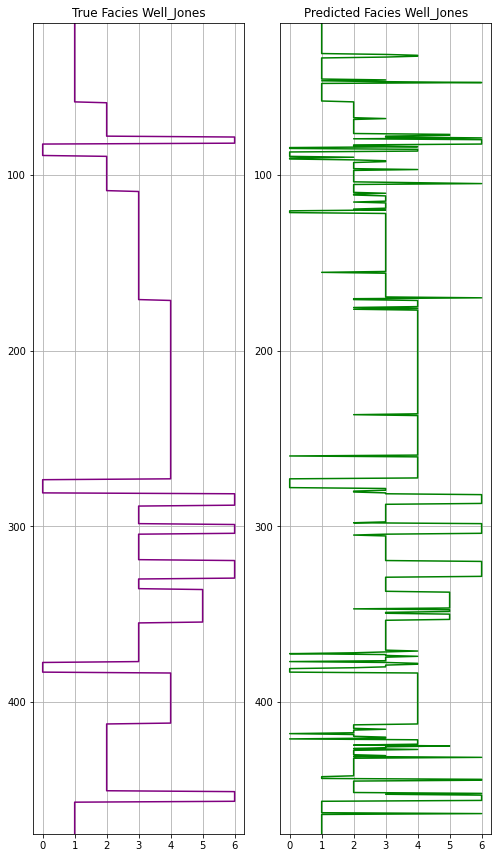

In [ ]:
x = [y_test, y_predkn]
y = [well_train_norm['Depth'], well_train_norm['Depth']]

color = ['purple', 'green']
title = ['True Facies Well_Jones', 'Predicted Facies Well_Jones']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,12))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])
  ax[i].grid(True)

plt.tight_layout(1)

plt.show

In [ ]:
#create the classifier
model = MLPClassifier()
hidden_layer_sizes=(100,),
activation='relu',
solver='adam',
alpha=0.0001,
batch_size='auto',
learning_rate='constant',
learning_rate_init=0.001,
power_t=0.5,
max_iter=200,
shuffle=True,
random_state=None,
tol=0.0001,
verbose=False,
warm_start=False,
momentum=0.9,
nesterovs_momentum=True,
early_stopping=False,
validation_fraction=0.1,
beta_1=0.9,
beta_2=0.999,
epsilon=1e-08,
n_iter_no_change=10,
max_fun=15000
#training model
model.fit(x_train, y_train)

#predict on well train
y_predmlp = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(y_test, y_predmlp)
print(conf)

[[ 12   0  13   5  10   1   1]
 [  0 113   8   5   0   0   2]
 [  2   3 113  25  11   1   1]
 [  2   3  14 196   6   8   3]
 [  0   0  11   4 247   0   0]
 [  0   0   2  10   0  26   0]
 [  0   1   3  35   0   0  27]]


In [ ]:
print(classification_report(y_test,y_predmlp))

              precision    recall  f1-score   support

           0       0.75      0.29      0.41        42
           1       0.94      0.88      0.91       128
           2       0.69      0.72      0.71       156
           3       0.70      0.84      0.77       232
           4       0.90      0.94      0.92       262
           5       0.72      0.68      0.70        38
           6       0.79      0.41      0.54        66

    accuracy                           0.79       924
   macro avg       0.79      0.68      0.71       924
weighted avg       0.80      0.79      0.79       924



<function matplotlib.pyplot.show>

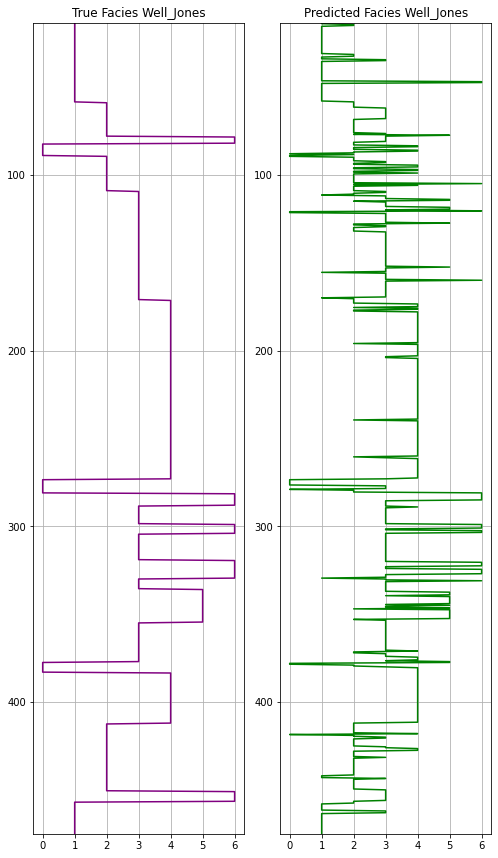

In [ ]:
x = [y_test, y_predmlp]
y = [well_train_norm['Depth'], well_train_norm['Depth']]

color = ['purple', 'green']
title = ['True Facies Well_Jones', 'Predicted Facies Well_Jones']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,12))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])
  ax[i].grid(True)

plt.tight_layout(1)

plt.show

In [ ]:
#create the classifier
model = LogisticRegression()
penalty='l2',
dual=False,
tol=0.0001,
C=1.0,
fit_intercept=True,
intercept_scaling=1,
class_weight=None,
random_state=None,
solver='lbfgs',
max_iter=100,
multi_class='auto',
verbose=0,
warm_start=False,
n_jobs=None,
l1_ratio=None
#training model
model.fit(x_train, y_train)

#predict on well train
y_predlogis = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(y_test, y_predlogis)
print(conf)

[[  5   0   3  12  20   1   1]
 [  0 106   6  14   0   0   2]
 [  0   1  71  34  43   0   7]
 [  4  16   9 181   8  10   4]
 [  2   0  21   5 234   0   0]
 [  0   0   7  24   0   7   0]
 [  1   8   1  38   1   0  17]]


In [ ]:
print(classification_report(y_test,y_predlogis))

              precision    recall  f1-score   support

           0       0.42      0.12      0.19        42
           1       0.81      0.83      0.82       128
           2       0.60      0.46      0.52       156
           3       0.59      0.78      0.67       232
           4       0.76      0.89      0.82       262
           5       0.39      0.18      0.25        38
           6       0.55      0.26      0.35        66

    accuracy                           0.67       924
   macro avg       0.59      0.50      0.52       924
weighted avg       0.65      0.67      0.65       924



<function matplotlib.pyplot.show>

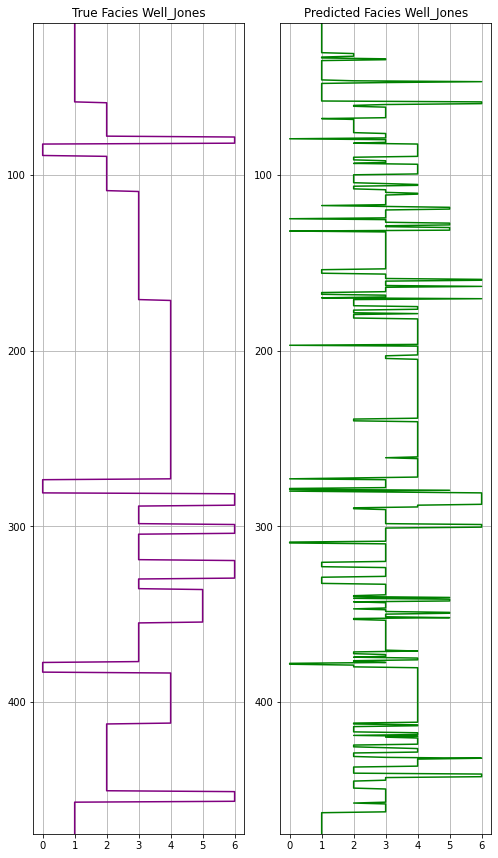

In [ ]:
x = [y_test, y_predlogis]
y = [well_train_norm['Depth'], well_train_norm['Depth']]

color = ['purple', 'green']
title = ['True Facies Well_Jones', 'Predicted Facies Well_Jones']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,12))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])
  ax[i].grid(True)

plt.tight_layout(1)

plt.show

In [ ]:
#create the classifier
model = RandomForestClassifier()

n_estimators=100,
criterion='mse',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features='auto',
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
bootstrap=True,
oob_score=False,
n_jobs=None,
random_state=None,
verbose=0,
warm_start=False,
ccp_alpha=0.0,
max_samples=None

#training model
model.fit(x_train, y_train)

#predict on well train
y_predrandom = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(y_test, y_predrandom)
print(conf)

[[ 41   0   0   1   0   0   0]
 [  0 125   2   0   1   0   0]
 [  0   0 152   4   0   0   0]
 [  0   0   0 232   0   0   0]
 [  0   0   0   0 262   0   0]
 [  0   0   0   0   0  38   0]
 [  0   0   0   1   0   0  65]]


In [ ]:
print(classification_report(y_test,y_predrandom))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      0.98      0.99       128
           2       0.99      0.97      0.98       156
           3       0.97      1.00      0.99       232
           4       1.00      1.00      1.00       262
           5       1.00      1.00      1.00        38
           6       1.00      0.98      0.99        66

    accuracy                           0.99       924
   macro avg       0.99      0.99      0.99       924
weighted avg       0.99      0.99      0.99       924



<function matplotlib.pyplot.show>

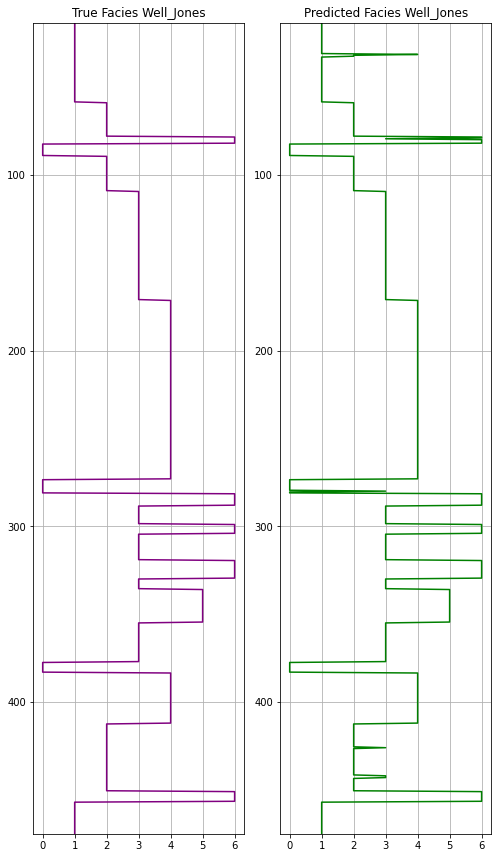

In [ ]:
x = [y_test, y_predrandom]
y = [well_train_norm['Depth'], well_train_norm['Depth']]

color = ['purple', 'green']
title = ['True Facies Well_Jones', 'Predicted Facies Well_Jones']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,12))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])
  ax[i].grid(True)

plt.tight_layout(1)

plt.show

In [ ]:
#define the test data

x_blind = well_pred[feature].values
y_blind = []
depths = well_pred['Depth'].values

In [ ]:
#normalize x_test of well
x_blind = scaler.fit_transform(x_blind)

#predict to well
y_blind = model.predict(x_blind)

In [ ]:
well_pred['facno'] = y_blind

well_pred

,TH,U,K,RHOMAA,UMAA,PHIN,Depth,facno
0,3.30,15.38,1.5,2.76,12.58,38.7,47.5,2
1,2.71,17.39,1.2,2.76,12.51,38.1,48.0,2
2,3.00,19.31,0.6,2.79,12.29,39.7,48.5,4
3,3.35,19.22,0.6,2.79,12.26,41.1,49.0,4
4,4.29,18.09,0.7,2.81,12.38,43.1,49.5,4
...,...,...,...,...,...,...,...,...
984,8.63,-1.05,3.4,3.01,10.11,46.3,539.5,2
985,8.37,-1.05,3.3,3.01,10.09,46.3,540.0,2
986,7.86,-1.05,3.1,3.02,10.09,46.3,540.5,2
987,6.84,-0.55,2.6,3.02,10.09,46.3,541.0,2


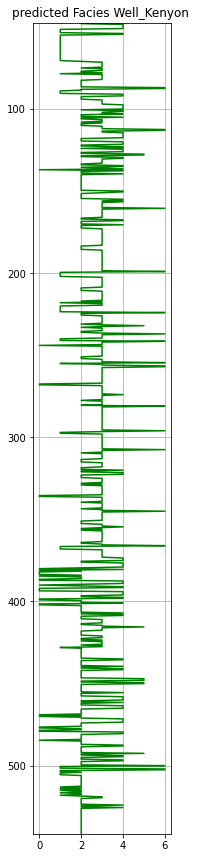

In [ ]:
plt.figure(figsize=(5,12))

plt.subplot(1,2,1)
plt.plot(y_blind, depths, color='green')
plt.ylim(max(depths), min(depths))
plt.title('predicted Facies Well_Kenyon ', size=12)

plt.tight_layout(1)
plt.grid(True)
plt.show()

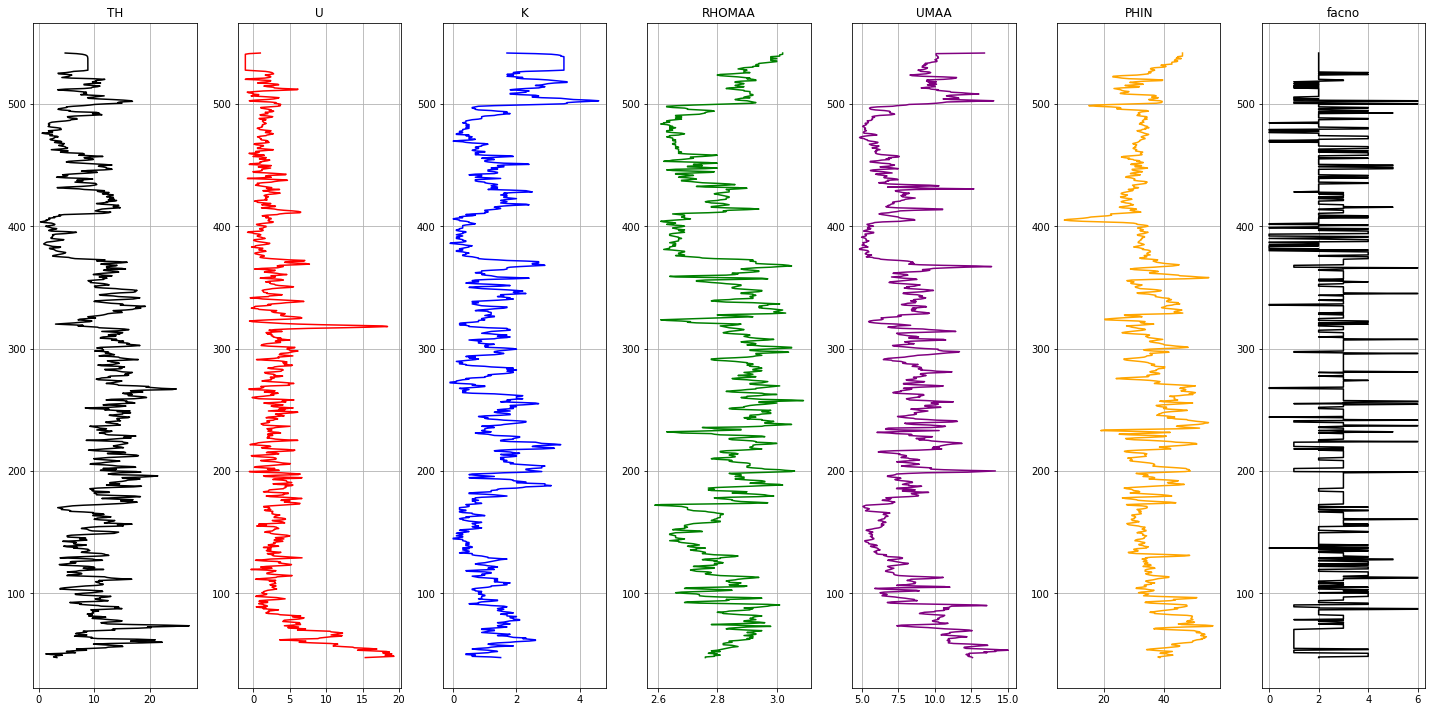

In [ ]:
# define what logs are we going to us
logs = ['TH', 'U', 'K', 'RHOMAA', 'UMAA', 'PHIN', 'facno']

# create teh subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots
colors = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'black']

for i in range(len(logs)):
  ax[i].plot(well_pred[logs[i]], well_pred['Depth'], color=colors[i])
  ax[i].set_title(logs[i])
  ax[i].grid(True)

plt.tight_layout(1.1)
plt.show()

In [ ]:
well_pred.to_csv('/content/Kenyon_Fasies.csv', index=False)